In [2]:
import pandas as pd

#loading the data
athletes = pd.read_csv("summerOly_athletes_clean.csv")
medals = pd.read_csv("summerOly_medals_counts_clean.csv")
countries = pd.read_csv("countries.csv")

In [3]:
merged_medals = medals.merge(countries, how = "left", on = "Country")

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

features = ["Rank", "Year", "Gold", "Silver", "Bronze"]
NOC = "BEL"
label = ["Total"]

X = merged_medals[features][merged_medals["NOC"] == NOC]
y = merged_medals[label][merged_medals["NOC"] == NOC]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 69)

In [5]:
#build model
regressor = DecisionTreeRegressor(max_depth=6, random_state=42)

#fit to data
regressor.fit(X_train, y_train)

#predictions
y_pred = regressor.predict(X_test)

#eval
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

Mean Squared Error: 4.600


In [6]:
y_pred = pd.DataFrame(y_pred, index = y_test.index)

test_years = merged_medals.iloc[y_test.index]["Year"].copy()
test_years.sort_values(inplace = True)

y_pred.sort_index(inplace = True)
y_test.sort_index(inplace = True)

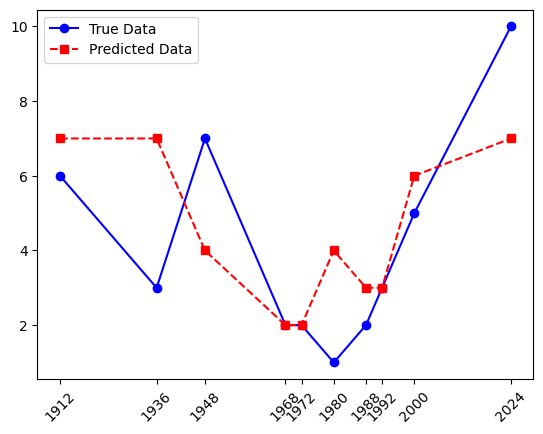

In [7]:
import matplotlib.pyplot as plt

y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.plot(test_years, y_test, 'o-', label="True Data", color='blue')
plt.plot(test_years, y_pred, 's--', label="Predicted Data", color='red')
plt.xticks(test_years, rotation = 45)
plt.legend()

plt.show()